Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


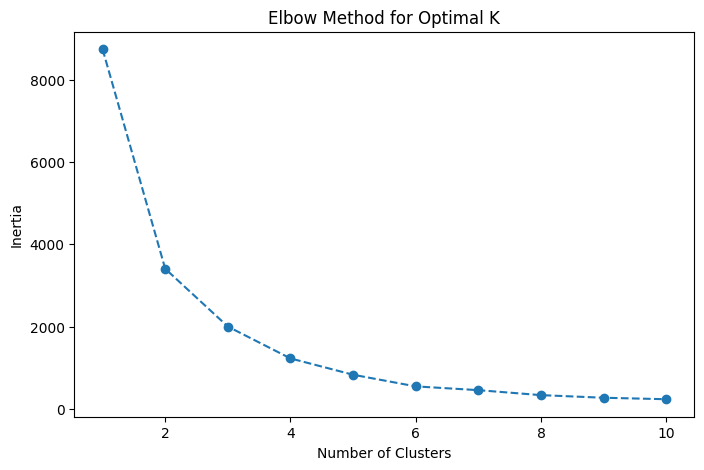

K-Means Silhouette Score: 0.81
DBSCAN Silhouette Score: 0.96
GMM Silhouette Score: 0.47


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
!pip install openpyxl
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/My Drive/Online_Retail.xlsx"

# Load the dataset
df = pd.read_excel(file_path, engine="openpyxl")
df = df.dropna(subset=['CustomerID'])  # Remove missing values
df['Total_Spending'] = df['Quantity'] * df['UnitPrice']  # Create new feature
features = df.groupby('CustomerID').agg({
    'Total_Spending': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['Total_Spending', 'Quantity']])

# K-Means Clustering
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Apply K-Means
optimal_k = 5  # Adjust based on elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
features['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
features['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# Apply GMM (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=5, random_state=42)
features['GMM_Cluster'] = gmm.fit_predict(scaled_features)

# 3D Interactive Visualization
fig = px.scatter_3d(features, x='Total_Spending', y='Quantity', z='CustomerID',
                     color=features['KMeans_Cluster'].astype(str),
                     title="3D Customer Segmentation - KMeans")
fig.show()

# Silhouette Score Comparison
kmeans_silhouette = silhouette_score(scaled_features, features["KMeans_Cluster"])
dbscan_silhouette = silhouette_score(scaled_features, features["DBSCAN_Cluster"]) if len(set(features["DBSCAN_Cluster"])) > 1 else -1
gmm_silhouette = silhouette_score(scaled_features, features["GMM_Cluster"])

print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.2f}")
print(f"GMM Silhouette Score: {gmm_silhouette:.2f}")